Use the new cice grid scripts and compare it to the old results

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cf_xarray
import rioxarray

In [2]:
_data_dir = {
    '1deg':'/g/data/ik11/inputs/access-om2/input_20201102/',
    '025deg':'/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/',
    '01deg':'/g/data/ik11/inputs/access-om2/input_20201102/'
}
    


In [3]:
cd /g/data/tm70/as2285/om3-utils/om3utils

/g/data/tm70/as2285/om3-utils/om3utils


In [4]:
res = ['1deg', '025deg', '01deg']

In [5]:
!qsub pbs_make_cice_grids.sh

112802892.gadi-pbs


In [8]:
! qstat 112802892

qstat: 112802892.gadi-pbs Job has finished, use -x or -H to obtain historical job information


# From esmgrids script

1deg
new vars not in old?
{'crs'}
missing vars in new?
{'latt_bonds', 'lonu_bonds', 'hue', 'hun', 'latu_bonds', 'lont_bonds'}
tlon anom min: nan, anom max: nan
angleT anom min: nan, anom max: nan
tlat anom min: nan, anom max: nan
uarea anom min: -1186349698.6215067, anom max: 33617654.79803729
hte anom min: nan, anom max: nan
ulon anom min: nan, anom max: nan
tarea anom min: -19085417.985637665, anom max: 9877771.11514306
angle anom min: nan, anom max: nan
htn anom min: nan, anom max: nan
ulat anom min: nan, anom max: nan
025deg
new vars not in old?
{'crs'}
missing vars in new?
set()
tlon anom min: nan, anom max: nan
angleT anom min: nan, anom max: nan
tlat anom min: nan, anom max: nan
uarea anom min: -69552757.44506374, anom max: 7366673.800787419
hte anom min: nan, anom max: nan
ulon anom min: 3.620558794636963e-05, anom max: 3.141592653589793
tarea anom min: nan, anom max: nan
angle anom min: -1.5707963267948966, anom max: 1.5707963267948966
htn anom min: nan, anom max: nan
ulat ano

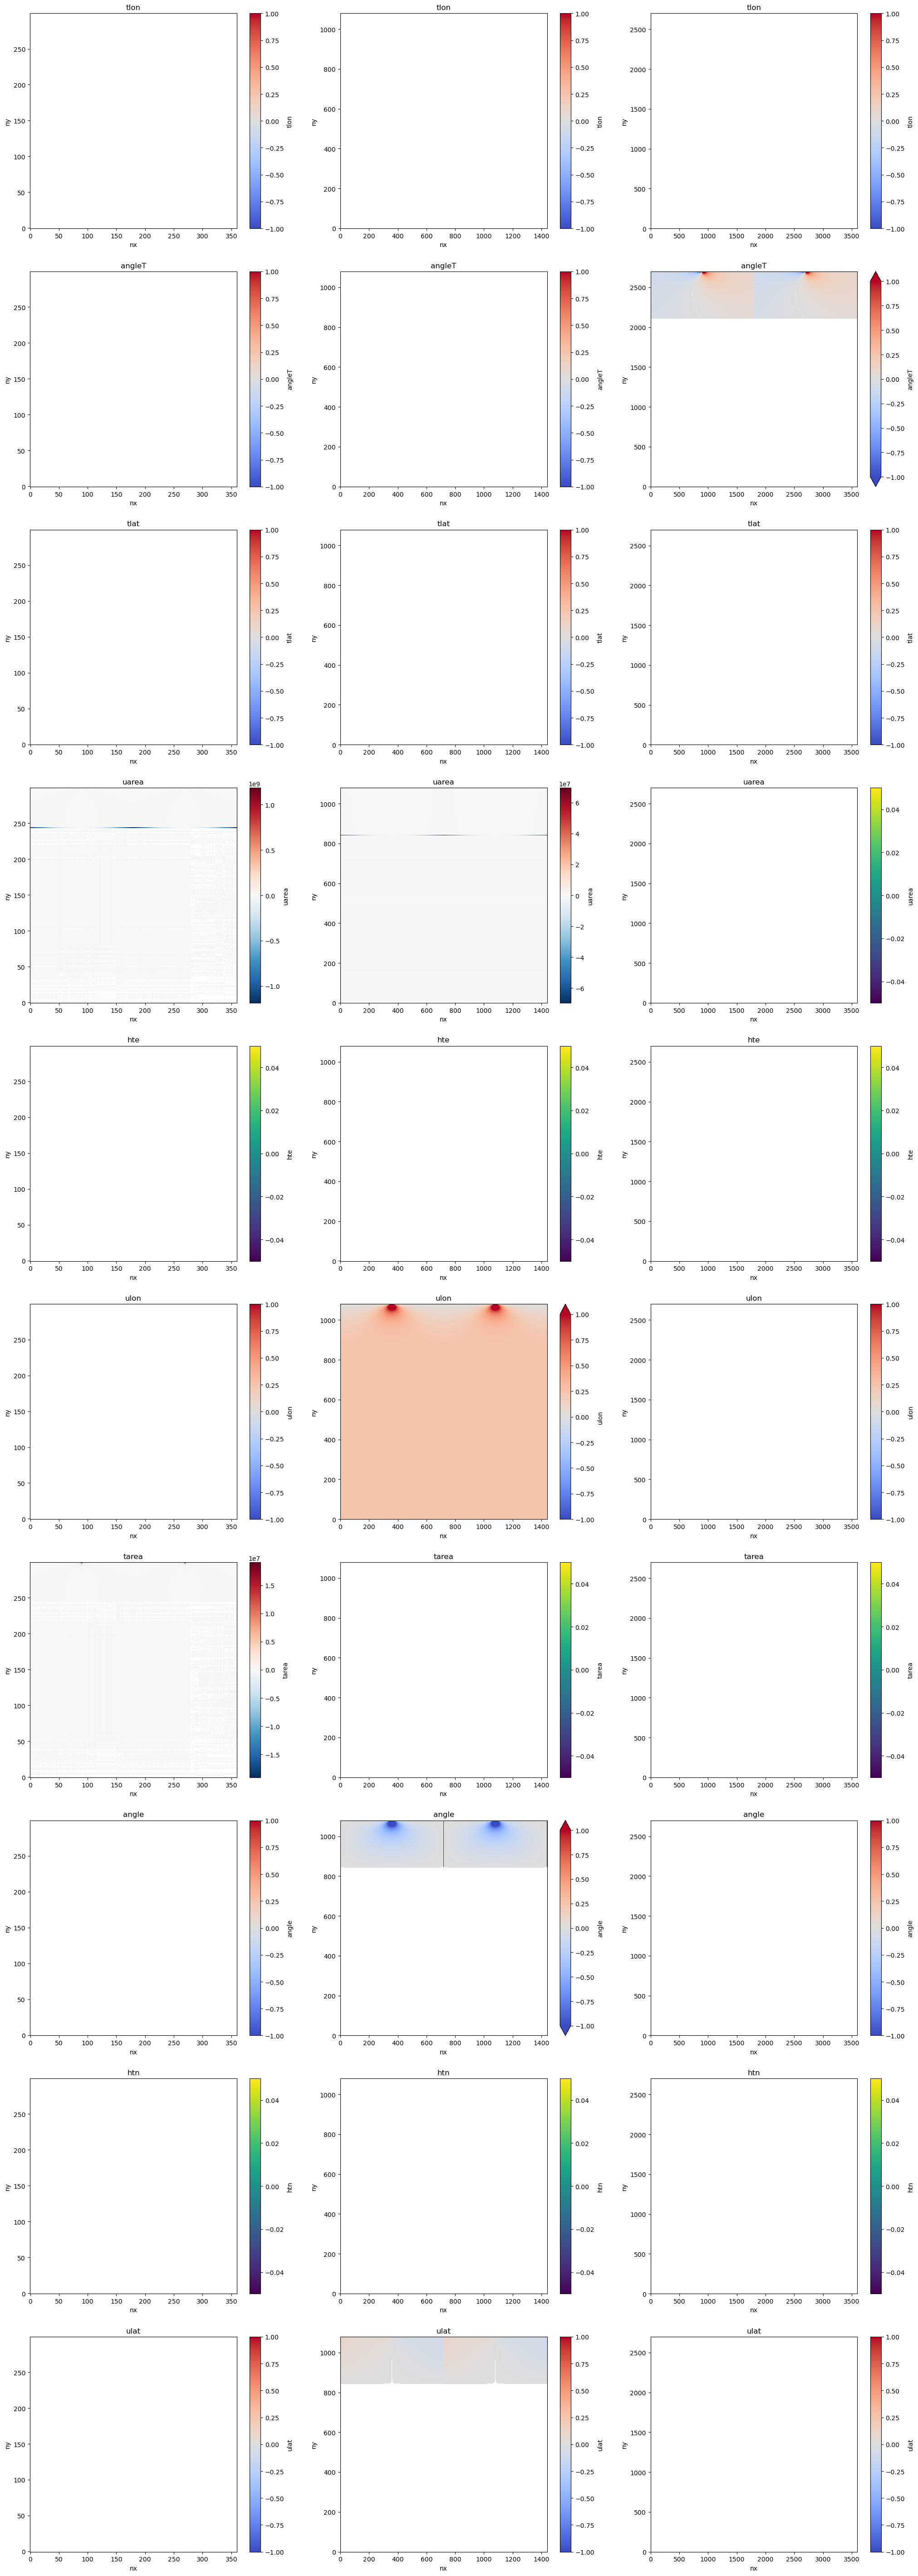

In [9]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.variables).difference(old_cice_grid.variables))
    print("missing vars in new?")
    print(set(old_cice_grid.variables).difference(new_cice_grid.variables))
    
    for j,jVar in enumerate(set(new_cice_grid.variables).intersection(old_cice_grid.variables)):
        
        plt.subplot(
            len(new_cice_grid.variables),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        if (jVar in (['ulat','ulon','tlat','tlon', 'angle', 'angleT'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

Confirm what is going on with 1degree u area

In [10]:
iRes = '1deg'
old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/grid.nc')
new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

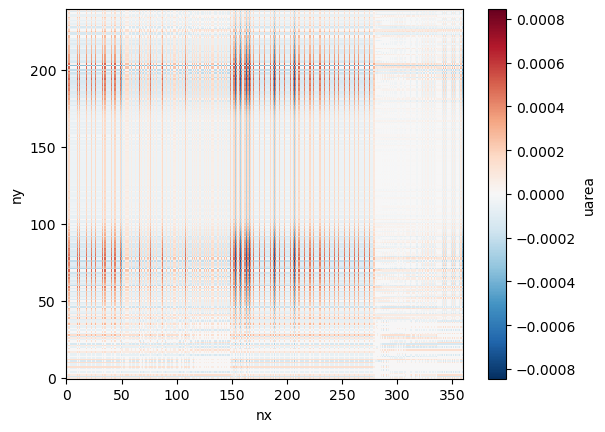

In [11]:
(new_cice_grid-old_cice_grid).sel(ny=slice(None,240)).uarea.plot()

More detail on 0.25 uarea

In [12]:
iRes = '025deg'
old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/grid.nc')
new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

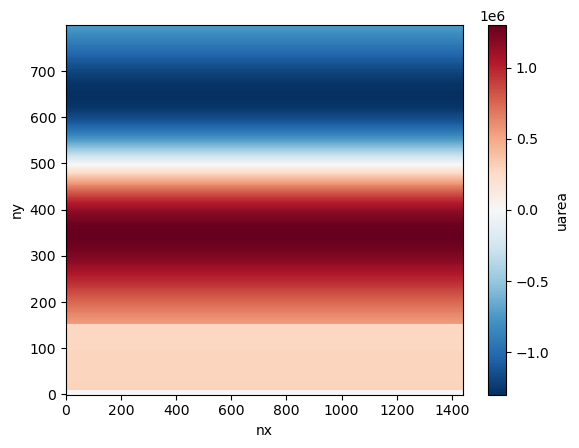

In [13]:
(new_cice_grid-old_cice_grid).sel(ny=slice(None,800)).uarea.plot()

Uarea was just set the same as tarea!

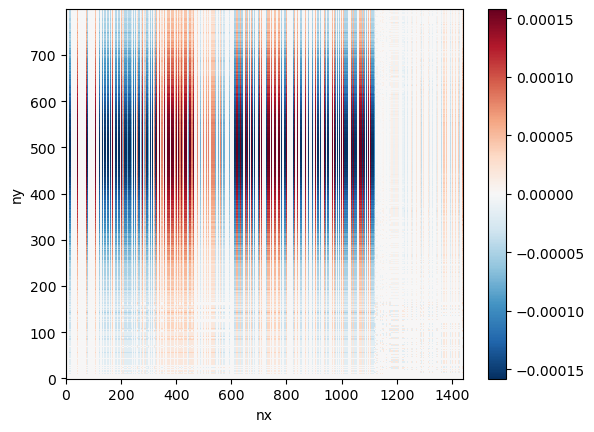

In [14]:
(old_cice_grid.tarea-old_cice_grid.uarea).isel(ny=slice(None,800)).plot()

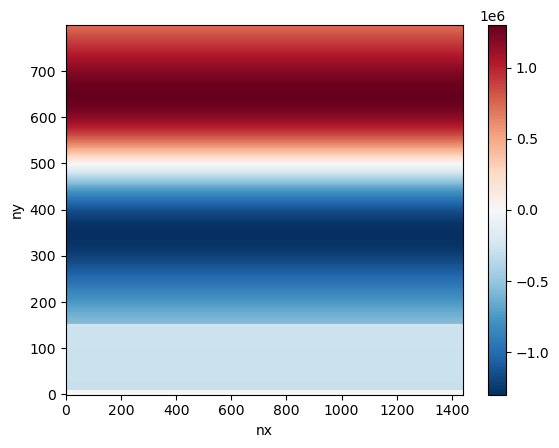

In [15]:
(new_cice_grid.tarea-new_cice_grid.uarea).isel(ny=slice(None,800)).plot()

Did we set the cf-attributes well?

In [16]:
new_cice_grid

<xarray.Dataset> Size: 124MB
Dimensions:  (ny: 1080, nx: 1440)
Coordinates:
    ulat     (ny, nx) float64 12MB ...
    ulon     (ny, nx) float64 12MB ...
    tlat     (ny, nx) float64 12MB ...
    tlon     (ny, nx) float64 12MB ...
Dimensions without coordinates: ny, nx
Data variables:
    crs      |S1 1B ...
    htn      (ny, nx) float64 12MB ...
    hte      (ny, nx) float64 12MB ...
    angle    (ny, nx) float64 12MB ...
    angleT   (ny, nx) float64 12MB ...
    tarea    (ny, nx) float64 12MB ...
    uarea    (ny, nx) float64 12MB ...
Attributes:
    timeGenerated:    2024-04-03 15:38:30.959930
    created_by:       as2285
    history:          Created using commit 8cc463a7f16a654f9f3c57e6a3e620ff4d...
    inputfile:        /g/data/ik11/inputs/access-om2/input_20230515_025deg_to...
    inputfile_md5:    38b6f324ae16cc13c180699123ad85b5
    history_command:  python make_CICE_grid.py /g/data/ik11/inputs/access-om2...
    Conventions:      CF-1.6

In [17]:
new_cice_grid.cf

Coordinates:
             CF Axes:   X, Y, Z, T: n/a

      CF Coordinates:   longitude: ['tlon', 'ulon']
                        latitude: ['tlat', 'ulat']
                        vertical, time: n/a

       Cell Measures:   area, volume: n/a

      Standard Names:   latitude: ['tlat', 'ulat']
                        longitude: ['tlon', 'ulon']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   angle_of_rotation_from_east_to_x: ['angle', 'angleT']
                        cell_area: ['tarea', 'uarea']

              Bounds:   n/a

       Grid Mappings:   tripolar_latitude_longitude: ['crs']

And the CRS?

In [18]:
new_cice_grid.rio.crs

In [19]:
rio_ds = rioxarray.open_rasterio(f'01deg/grid.nc')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeore

Rio doesn't handle 2d geolocation arrays

In [20]:
! gdalinfo NETCDF:01deg/grid.nc:uarea

Warning 1: dimension #1 (nx) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny) is not a Latitude/Y dimension.
Driver: netCDF/Network Common Data Format
Files: 01deg/grid.nc
Size is 3600, 2700
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ID["EPSG",6326]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["radians",1],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["radians",1,
                ID["EPSG",9122]]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["radians",1,
                ID["EPSG",9122]]]]
Data axis to CRS axis mapping: 2,1
Metadata:
  crs#crs_wkt=GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["radians",1,AUTH

GDAL doesn't seem to use the CRS for the geolocation array! https://github.com/COSIMA/om3-scripts/issues/7#issuecomment-2011723581

In [21]:
! gdalinfo NETCDF:{_data_dir[iRes]}/cice_01deg/grid.nc:uarea

ERROR 4: NETCDF:/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog//cice_01deg/grid.nc:uarea: No such file or directory
gdalinfo failed - unable to open 'NETCDF:/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog//cice_01deg/grid.nc:uarea'.


And again for kmt

1deg
new vars not in old?
{'crs'}
missing vars in new?
set()
kmt anom min: nan, anom max: nan
025deg
new vars not in old?
{'crs'}
missing vars in new?
set()
kmt anom min: nan, anom max: nan
01deg
new vars not in old?
{'crs'}
missing vars in new?
set()
kmt anom min: nan, anom max: nan


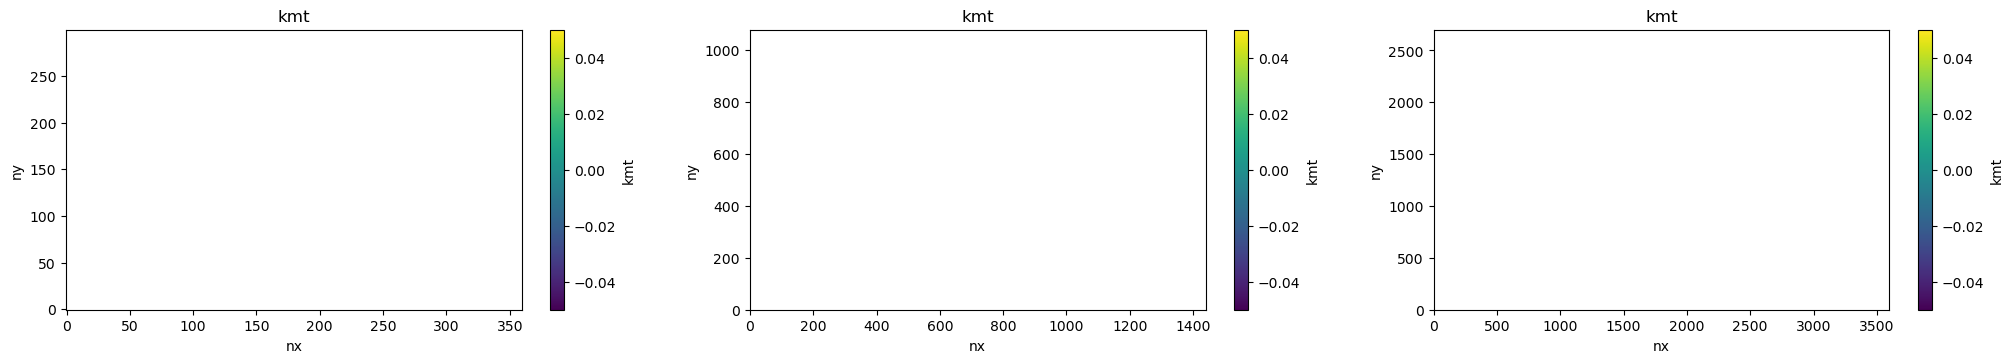

In [22]:
plt.figure(figsize=(25,8))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/kmt.nc')
    new_cice_grid = xr.open_dataset(f'{iRes}/kmt.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.variables).difference(old_cice_grid.variables))
    print("missing vars in new?")
    print(set(old_cice_grid.variables).difference(new_cice_grid.variables))
    
    for j,jVar in enumerate(set(new_cice_grid.variables).intersection(old_cice_grid.variables)):
        
        plt.subplot(
            len(new_cice_grid.variables),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        anom.plot()

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        plt.title(jVar)

In [23]:
! ncdump -h 025deg/kmt.nc

netcdf kmt {
dimensions:
	nx = 1440 ;
	ny = 1080 ;
variables:
	char crs ;
		crs:grid_mapping_name = "tripolar_latitude_longitude" ;
		crs:crs_wkt = "GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"radians\",1,AUTHORITY[\"EPSG\",\"9122\"]],AXIS[\"Latitude\",NORTH],AXIS[\"Longitude\",EAST],AUTHORITY[\"EPSG\",\"4326\"]]" ;
	double kmt(ny, nx) ;
		kmt:grid_mapping = "crs" ;
		kmt:standard_name = "sea_binary_mask" ;

// global attributes:
		:timeGenerated = "2024-04-03 15:38:32.491447" ;
		:created_by = "as2285" ;
		:history = "Created using commit 8cc463a7f16a654f9f3c57e6a3e620ff4dc7a757 of git@github.com:anton-seaice/om3-utils.git" ;
		:inputfile = "/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/mom_025deg/ocean_mask.nc" ;
		:inputfile_md5 = "ee07436042b71df2938726854be5a9aa" ;
		:history_command = "python cice_grid.py /g/data/i